# Experiment 6 : Grow of stables attractors fields in Linear CBN

This experiment explore the growth of stable attractor fields in CBN with Linear topology and same local networks. Its important see what happened with the Linear CBN with more local networks

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the database
# df = pd.read_csv("outputs/exp6_linear_aleatory_3_10_10000/data.csv")
df = pd.read_csv("outputs/exp6_linear_aleatory_3_10_1000/data.csv")
# df.head()

# show the column names
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_local_attractors',
       'n_pair_attractors', 'n_attractor_fields', 'n_time_find_attractors',
       'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

## Basics Estatistics

In [118]:
# Seleccionar las columnas requeridas y crear el nuevo DataFrame
df_resume = df[['n_local_networks','n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]

# Realizar un resumen estadístico
df_resume.describe()

,n_local_networks,n_local_attractors,n_pair_attractors,n_attractor_fields
count,8000.000000,8000.000000,8000.000000,8.000000e+03
mean,6.500000,17.263500,23.433625,1.203528e+04
std,2.291431,9.952145,29.757605,5.132575e+05
min,3.000000,5.000000,0.000000,0.000000e+00
25%,4.750000,11.000000,9.000000,1.000000e+00
50%,6.500000,15.000000,14.000000,1.000000e+00
75%,8.250000,20.000000,26.000000,1.600000e+01
max,10.000000,108.000000,729.000000,4.304672e+07


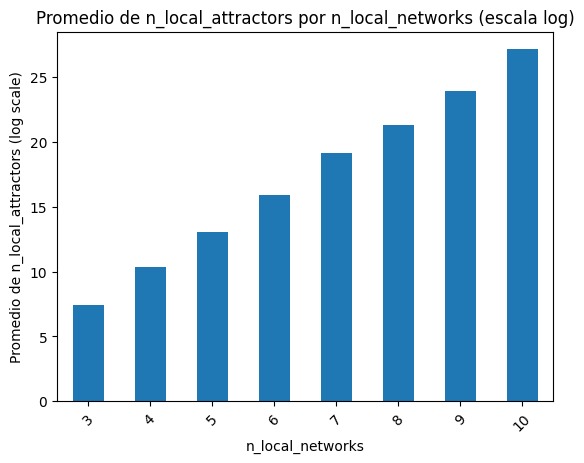

In [119]:
# Agrupar por 'n_local_networks' y calcular el promedio de 'n_local_attractors'
grouped_data = df.groupby('n_local_networks')['n_local_attractors'].mean()

# Crear el histograma 
grouped_data.plot(kind='bar')

# Personalizar el gráfico
plt.title('Promedio de n_local_attractors por n_local_networks')
plt.xlabel('n_local_networks')
plt.ylabel('Promedio de n_local_attractors')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()

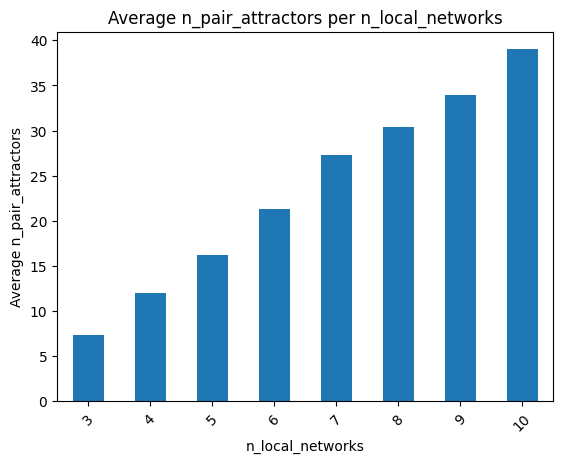

In [120]:
import matplotlib.pyplot as plt

# Group by 'n_local_networks' and calculate the mean of 'n_pair_attractors'
grouped_data = df.groupby('n_local_networks')['n_pair_attractors'].mean()

# Create the bar plot with different colors for each column
grouped_data.plot(kind='bar')

# Customize the plot
plt.title('Average n_pair_attractors per n_local_networks')
plt.xlabel('n_local_networks')
plt.ylabel('Average n_pair_attractors')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

                                      

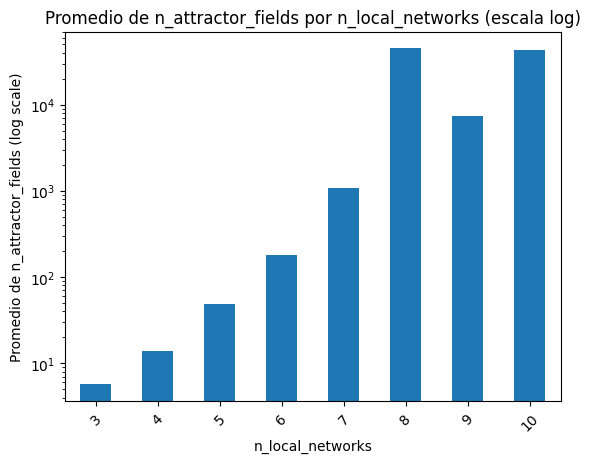

In [121]:
# Agrupar por 'n_local_networks' y calcular el promedio de 'n_attractor_fields'
grouped_data = df.groupby('n_local_networks')['n_attractor_fields'].mean()

# Crear el histograma con escala logarítmica en el eje y y colores diferentes
grouped_data.plot(kind='bar', logy=True)

# Personalizar el gráfico
plt.title('Promedio de n_attractor_fields por n_local_networks (escala log)')
plt.xlabel('n_local_networks')
plt.ylabel('Promedio de n_attractor_fields (log scale)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()

## Advanced Statistics

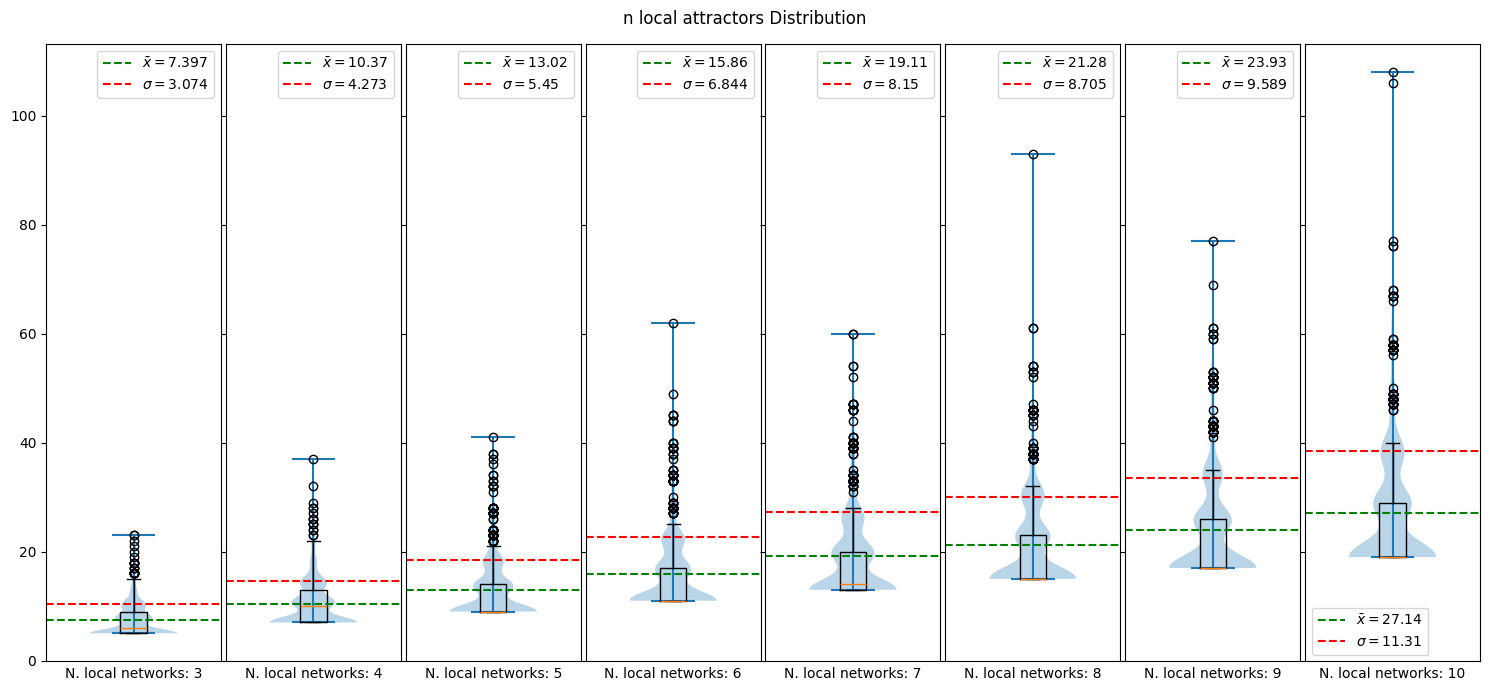

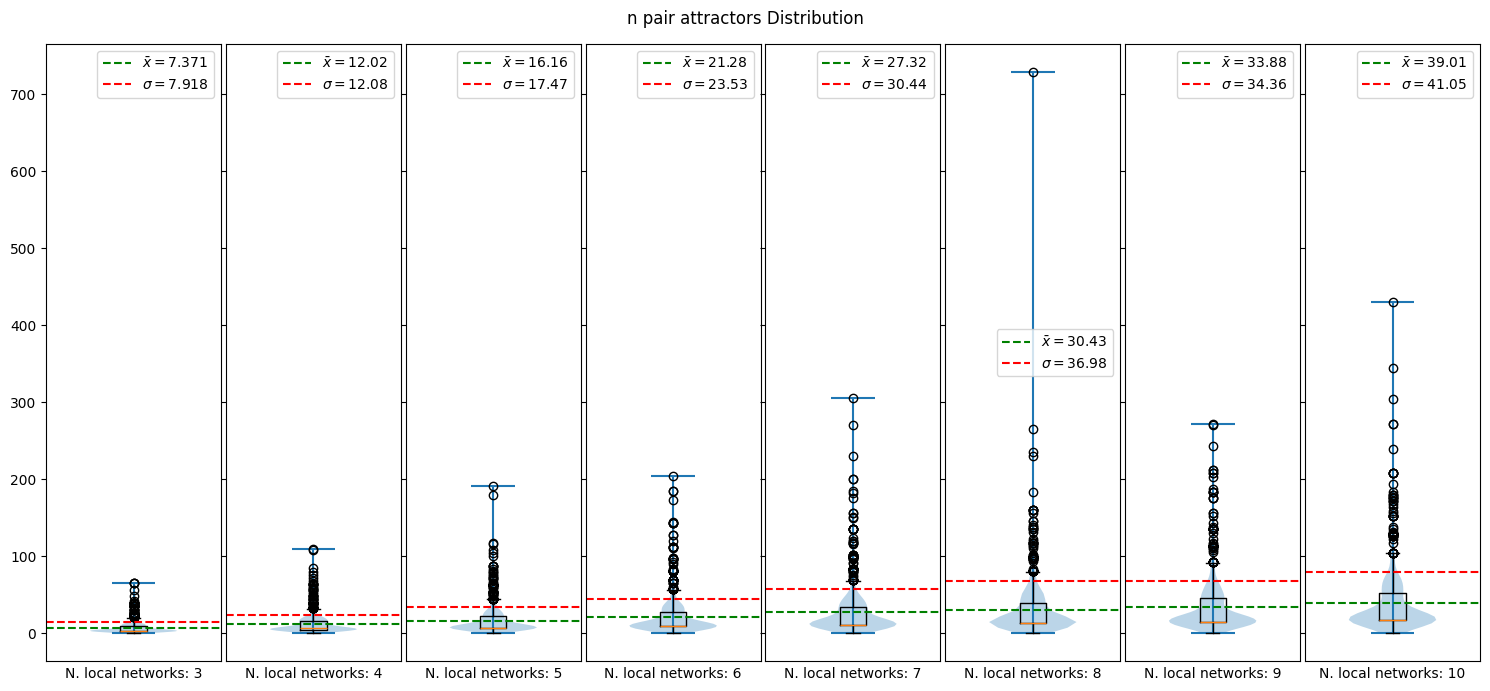

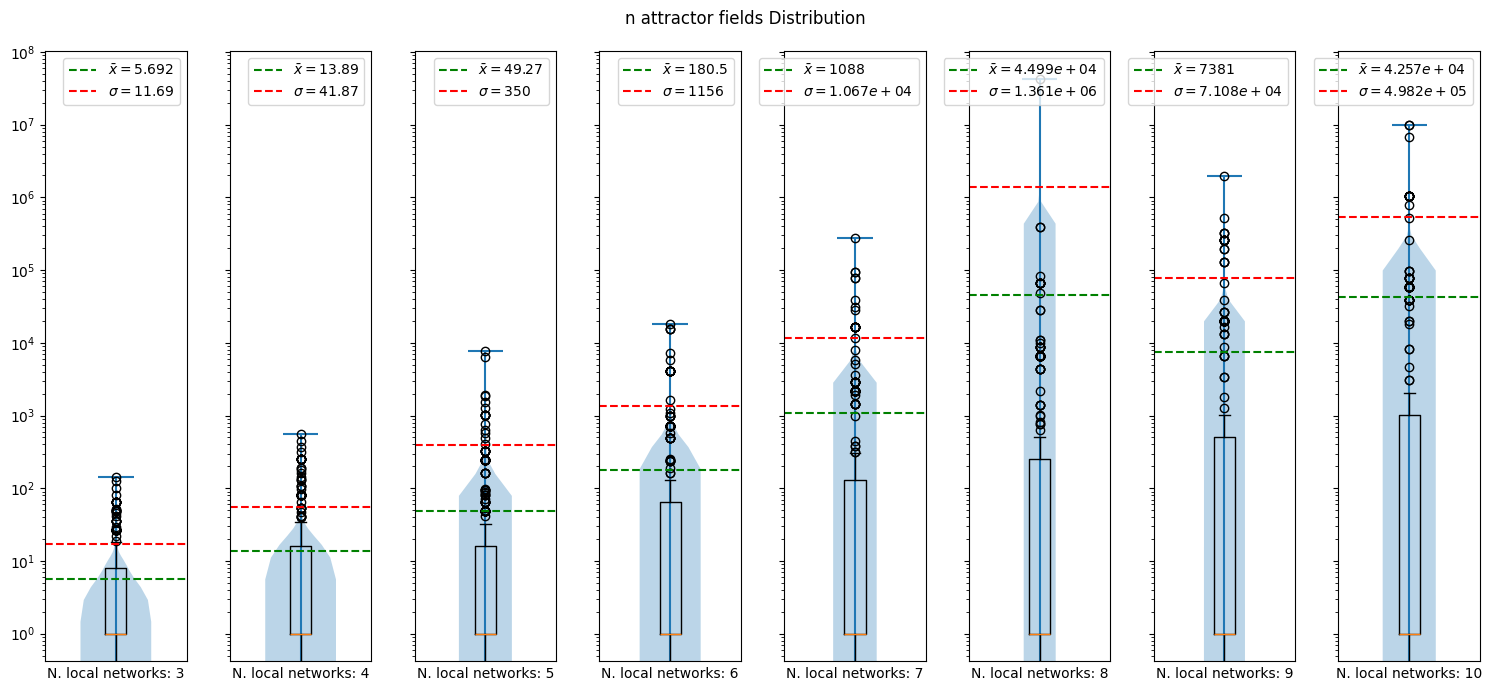

In [122]:
# Obtener los últimos tres valores únicos de n_local_networks
n_local_networks_unique = df_resume['n_local_networks'].unique()
n_local_networks_last_three = sorted(n_local_networks_unique)

# Violin graphs
attributes = ['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']

for attribute in attributes:
    fig, axs = plt.subplots(1, len(n_local_networks_last_three), sharey=True, figsize=(15, 7))

    for i, n_networks in enumerate(n_local_networks_last_three):
        data = df_resume[df_resume['n_local_networks'] == n_networks][attribute]

        axs[i].violinplot(data)
        axs[i].boxplot(data)
        axs[i].set_xlabel(f'N. local networks: {n_networks}')
        axs[i].set_xticks([])
        axs[i].set_xlim((0.5, 1.5))

        mean = data.mean()
        std_dev = data.std()
        axs[i].axhline(mean, color='g', ls='--', label=fr'$\bar{{x}}={mean:.4g}$')
        axs[i].axhline(mean + std_dev, color='r', ls='--', label=fr'$\sigma={std_dev:.4g}$')
        axs[i].legend()

        if attribute == 'n_attractor_fields':  # Aplicar escala log solo en el último atributo
            axs[i].set_yscale('log')

    fig.suptitle(f'{attribute.replace("_", " ")} Distribution')
    fig.tight_layout(w_pad=0)

plt.show()

## Incremental Taxs 

In [143]:
# Ordenar el DataFrame por 'i_sample' y 'n_local_networks'
df_sorted = df.sort_values(['i_sample', 'n_local_networks'])

# Calcular la diferencia en 'n_attractor_fields' para cada par de valores consecutivos de 'n_local_networks' para un mismo 'i_sample'
df_sorted['diff_n_attractor_fields'] = df_sorted.groupby(['i_sample'])['n_attractor_fields'].diff()

# Eliminar las filas que contienen NaN (correspondientes al primer valor de 'n_local_networks' para cada 'i_sample')
df_sorted = df_sorted.dropna(subset=['diff_n_attractor_fields'])

# Calcular el promedio de las diferencias por 'i_sample'
average_diff_by_i_sample = df_sorted.groupby('i_sample')['diff_n_attractor_fields'].mean()

# Mostrar el promedio de las diferencias por 'i_sample'
average_diff_by_i_sample.describe()

count    1.000000e+03
mean     6.081216e+03
std      7.117177e+04
min     -2.042857e+01
25%     -1.428571e-01
50%      0.000000e+00
75%      1.446429e+02
max      1.395089e+06
Name: diff_n_attractor_fields, dtype: float64

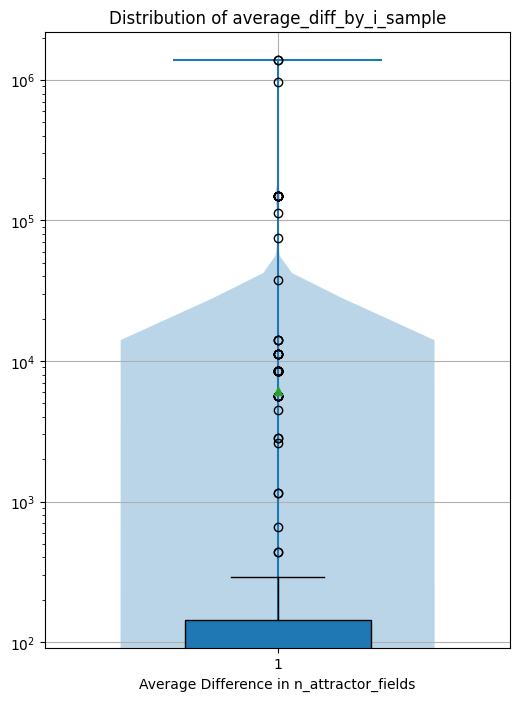

In [146]:
import matplotlib.pyplot as plt

# Violin graph and boxplot for 'average_diff_by_i_sample'
plt.figure(figsize=(6, 8))

# Violin plot
plt.violinplot(average_diff_by_i_sample.values, vert=True, widths=0.9)

# Boxplot
plt.boxplot(average_diff_by_i_sample.values, vert=True, widths=0.4, patch_artist=True, showmeans=True)

# Log scale for y-axis
plt.yscale('log')

# Customize plot
plt.title('Distribution of average_diff_by_i_sample')
plt.xlabel('Average Difference in n_attractor_fields')
plt.ylabel('')
plt.grid(True)

# Show plot
plt.show()

# Top 20

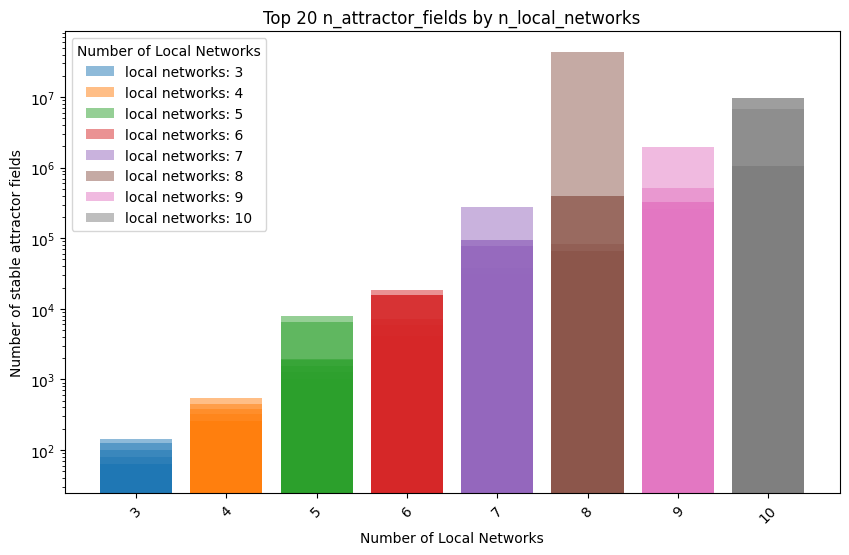

In [170]:
import matplotlib.pyplot as plt

# Group by 'n_local_networks' and find the top 20 values of 'n_attractor_fields' for each group
top_20_by_n_local_network = df.groupby('n_local_networks')['n_attractor_fields'].nlargest(20)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))

# Iterate over each group and draw the bars only for the top 20 values
for network, values in top_20_by_n_local_network.groupby(level=0):
    plt.bar([f'{network}'] * len(values), values.values, label=f'local networks: {network}', alpha=0.5)

# Customize the plot
plt.title('Top 20 n_attractor_fields by n_local_networks')
plt.xlabel('Number of Local Networks')
plt.ylabel('Number of stable attractor fields')
plt.xticks(rotation=45)
plt.yscale('log')  # Apply log scale on the y-axis
plt.legend(title='Number of Local Networks')

# Show the plot
plt.show()

## Dispersion Graph

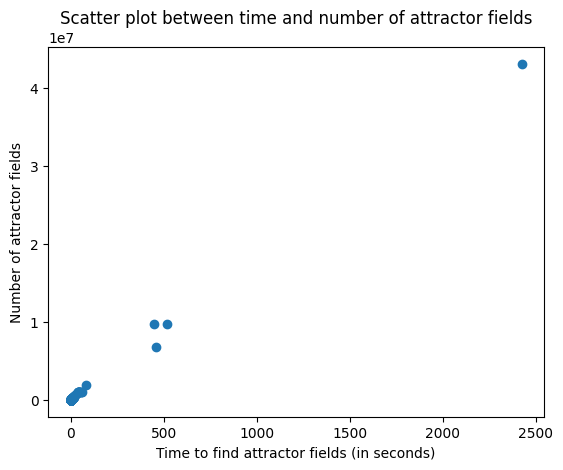

In [162]:
# Create a scatter plot
plt.scatter(df['n_time_find_fields'], df['n_attractor_fields'])
plt.xlabel('Time to find attractor fields (in seconds)')
plt.ylabel('Number of attractor fields')
plt.title('Scatter plot between time and number of attractor fields')
plt.show()

## Power-Law Distribution

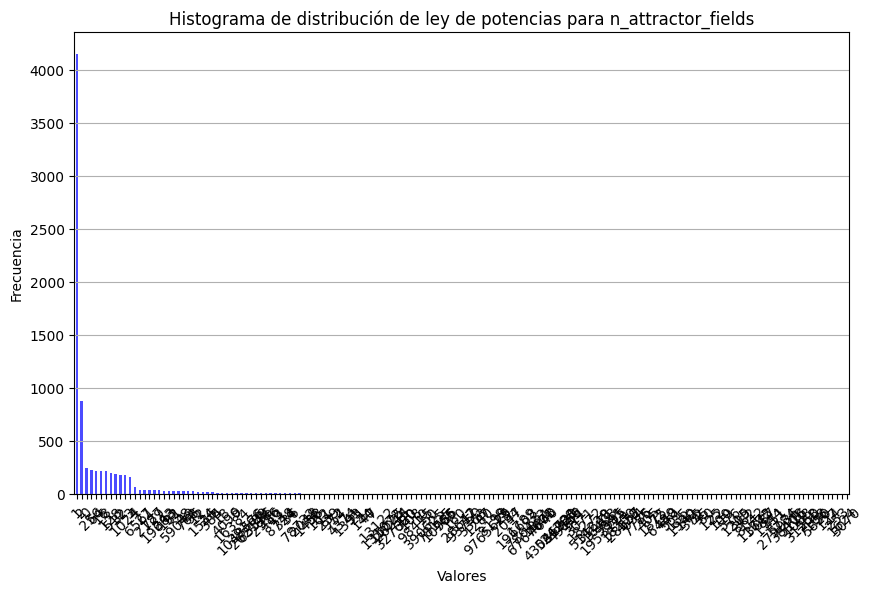

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el histograma de frecuencias
histogram = df['n_attractor_fields'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Histograma de distribución de ley de potencias para n_attractor_fields')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()